In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("train.csv")

In [3]:
#fist five observations
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#all information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#five point summary
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#data types
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
#checking for null values

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Null Value Imputations

In [9]:
df["Age"]=df["Age"].fillna(df["Age"].median())

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df["Cabin"]

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [12]:
df["Cabin"].fillna(method="bfill", inplace=True)

In [13]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          1
Embarked       2
dtype: int64

In [14]:
df["Cabin"].fillna(method="ffill", inplace=True)

In [15]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [16]:
df.dropna(inplace=True)

In [17]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C123,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,E46,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B42,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,C148,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [18]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Statistical Test

In [57]:
from scipy import stats

for i in df.columns:
    stat, p_value = stats.shapiro(df[i])
    print(f"Shapiro-Wilk test for column '{i}':")
    print(f"   - Test Statistic: {stat}")
    print(f"   - P-value: {p_value}")
    
    alpha = 0.05
    if p_value > alpha:
        print("   - The data appears to be normally distributed (fail to reject the null hypothesis)\n")
    else:
        print("   - The data does not appear to be normally distributed (reject the null hypothesis)\n")


Shapiro-Wilk test for column 'Survived':
   - Test Statistic: 0.6161739826202393
   - P-value: 1.8716723198447284e-40
   - The data does not appear to be normally distributed (reject the null hypothesis)

Shapiro-Wilk test for column 'Pclass':
   - Test Statistic: 0.7179337739944458
   - P-value: 3.512059857316362e-36
   - The data does not appear to be normally distributed (reject the null hypothesis)

Shapiro-Wilk test for column 'Sex':
   - Test Statistic: 0.6034404635429382
   - P-value: 6.381232946842352e-41
   - The data does not appear to be normally distributed (reject the null hypothesis)

Shapiro-Wilk test for column 'Age':
   - Test Statistic: 0.9540998935699463
   - P-value: 4.865807764677522e-16
   - The data does not appear to be normally distributed (reject the null hypothesis)

Shapiro-Wilk test for column 'SibSp':
   - Test Statistic: 0.513528048992157
   - P-value: 6.58610278232664e-44
   - The data does not appear to be normally distributed (reject the null hypothesi

In [19]:

from scipy.stats import chi2_contingency
for i in df.columns:
    contingency_table = pd.crosstab(df[i], df['Survived'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis: There is a significant association between " ,i,"and Survival")
    else:
        print("Failed to reject the null hypothesis: There may not be a significant association between ",i)

Failed to reject the null hypothesis: There may not be a significant association between  PassengerId
Reject the null hypothesis: There is a significant association between  Survived and Survival
Reject the null hypothesis: There is a significant association between  Pclass and Survival
Failed to reject the null hypothesis: There may not be a significant association between  Name
Reject the null hypothesis: There is a significant association between  Sex and Survival
Reject the null hypothesis: There is a significant association between  Age and Survival
Reject the null hypothesis: There is a significant association between  SibSp and Survival
Reject the null hypothesis: There is a significant association between  Parch and Survival
Reject the null hypothesis: There is a significant association between  Ticket and Survival
Reject the null hypothesis: There is a significant association between  Fare and Survival
Failed to reject the null hypothesis: There may not be a significant associ

In [20]:
#from this we removing the non associated columns from the data

In [21]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Deleting unwanted columns 

In [22]:
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

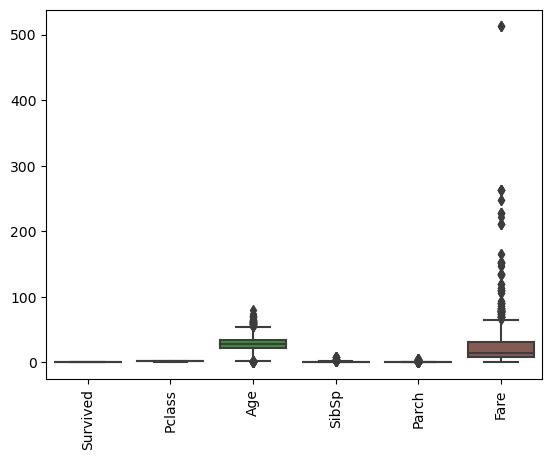

In [23]:
#outliers
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

In [24]:
#there are some outliers present in the data


In [25]:
#dealing with columns


In [26]:
df.drop("Cabin",axis=1,inplace=True)

In [27]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [28]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [29]:
df['Embarked']=df['Embarked'].replace({'S':0,'C':1,"Q":2})

In [30]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,0
1,1,1,female,38.0,1,0,71.2833,1
2,1,3,female,26.0,0,0,7.9250,0
3,1,1,female,35.0,1,0,53.1000,0
4,0,3,male,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,0
887,1,1,female,19.0,0,0,30.0000,0
888,0,3,female,28.0,1,2,23.4500,0
889,1,1,male,26.0,0,0,30.0000,1


In [31]:
df["Sex"]=df["Sex"].replace({"male":0,"female":1})

In [32]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0
887,1,1,1,19.0,0,0,30.0000,0
888,0,3,1,28.0,1,2,23.4500,0
889,1,1,0,26.0,0,0,30.0000,1


# Graphical Representation

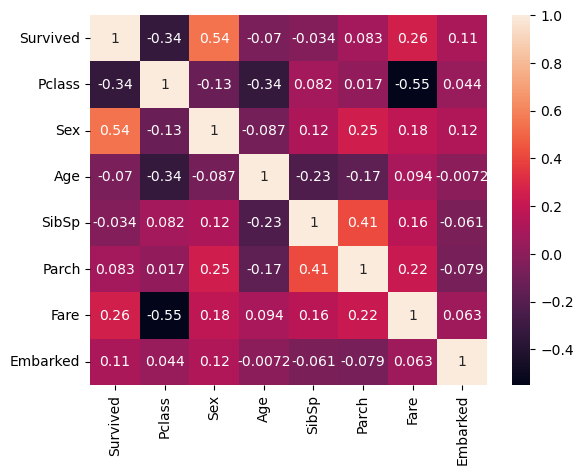

In [33]:
#correlation
sns.heatmap(df.corr(),annot=True)
plt.show()

In [34]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

<Axes: >

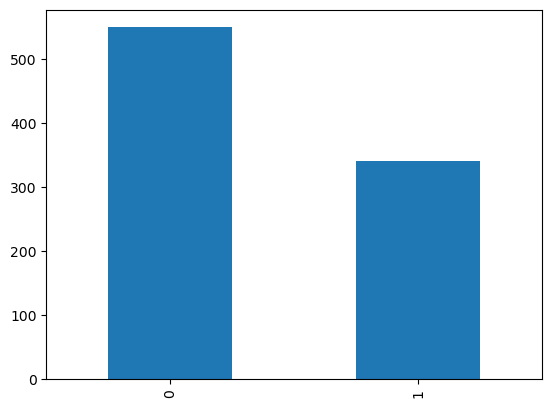

In [35]:
df["Survived"].value_counts().plot(kind="bar")

<Axes: >

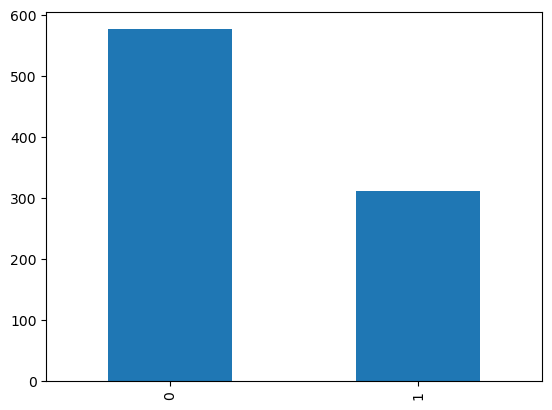

In [36]:
df["Sex"].value_counts().plot(kind="bar")

<Axes: >

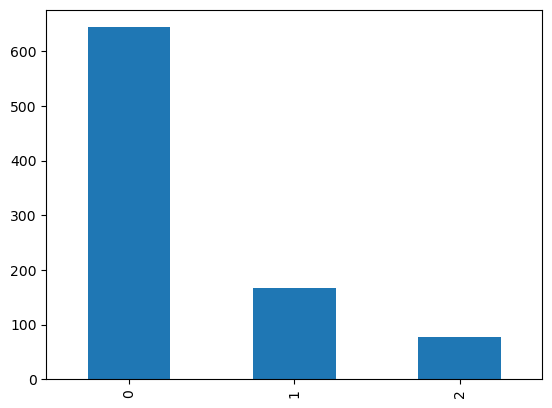

In [37]:
df["Embarked"].value_counts().plot(kind="bar")

In [38]:
#spliting the data 


In [39]:
x=df.drop("Survived",axis=1)
y=df["Survived"]

# Spliting of data ( for training and testing)

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
#scaling the data
from sklearn.preprocessing import StandardScaler

In [42]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=0,test_size=0.3)

In [43]:
np.mean(xtrain)

Pclass       2.319936
Sex          0.344051
Age         29.263408
SibSp        0.538585
Parch        0.384244
Fare        31.107977
Embarked     0.368167
dtype: float64

# Model Buliding

In [44]:
#model

In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [46]:
model = RandomForestClassifier(n_estimators=90,criterion="entropy")

In [47]:
model.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', n_estimators=90)

In [48]:
ypred=model.predict(xtest)

In [49]:

from sklearn.metrics import classification_report,f1_score,confusion_matrix,precision_score,accuracy_score,roc_curve


In [50]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       157
           1       0.79      0.74      0.76       110

    accuracy                           0.81       267
   macro avg       0.81      0.80      0.80       267
weighted avg       0.81      0.81      0.81       267



In [51]:
#model have 81 percentage of accuracy
from matplotlib.colors import ListedColormap

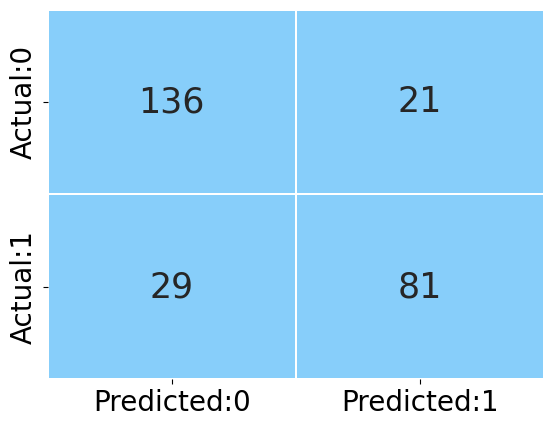

In [52]:
con=confusion_matrix(ytest,ypred)

conf_matrix = pd.DataFrame(data = con,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

***conclusion***

*1)The evaluation metrics indicate a reasonably good performance of the model, with balanced precision and recall for both 
classes.

*2)The model may be slightly better at predicting instances that did not survive (class 0) compared to those that survived 
(class 1).


*3)The overall accuracy of 81% suggests that the model is performing well on the given test set.


*4)Consider the specific context of the problem and the relative importance of precision and recall based on the 
application. For example, in a medical context, where false positives and false negatives have different implications, 
the balance between precision and recall may need to be adjusted.